<a href="https://colab.research.google.com/github/gp-kiet/Big-Data/blob/main/Big_Data_Hadoop_(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data**
Contents we will study:

**Hadoop**: History of Hadoop, Apache Hadoop, the Hadoop Distributed File System, components of Hadoop, data format, analyzing data with Hadoop, scaling out, Hadoop streaming, Hadoop pipes, Hadoop Echo System.

**Map Reduce**: Map Reduce framework and basics, how Map Reduce works, developing a Map Reduce application, unit tests with MR unit, test data and local tests, anatomy of a Map Reduce job run, failures, job scheduling, shuffle and sort, task execution, Map Reduce types, input formats, output formats, Map Reduce features, Real-world Map Reduce

* Hadoop
  - New Releases https://dlcdn.apache.org/hadoop/common/
  - Archives https://archive.apache.org/dist/hadoop/common/
---


**Introduction**

Hadoop is an open-source framework designed for processing and storing large datasets across distributed clusters of computers. It was inspired by Google's MapReduce and Google File System (GFS) to handle big data efficiently.


**History of Hadoop**

Developed by Doug Cutting and Mike Cafarella in 2005. Initially part of the Apache Nutch project, later split into a separate project under the Apache Software Foundation. Named after Doug Cutting’s son’s toy elephant. Became an Apache top-level project in 2008.
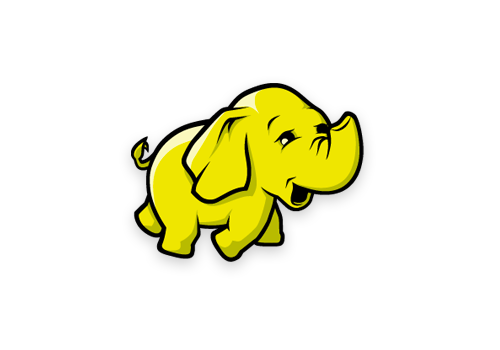

**Apache Hadoop**

Open-source implementation of Google's MapReduce and Google File System.
Designed to scale from a single server to thousands of machines.
Fault-tolerant and handles failures automatically.

2. Hadoop Distributed File System (HDFS)
HDFS is Hadoop's storage system designed for large-scale data storage and high-throughput access.

Key features:
- Distributed Storage: Data is split into blocks and stored across multiple nodes.
- Fault Tolerance: Data replication ensures no data loss.
- Scalability: Can handle petabytes of data.


Hadoop Distributed File System (HDFS) is a scalable, fault-tolerant, distributed storage system designed to store and process large volumes of data across multiple machines in a cluster. HDFS is a core component of the Apache Hadoop ecosystem and is optimized for handling big data workloads efficiently.

1. Features of HDFS
HDFS is designed to address the challenges of big data storage and processing by providing:
- Scalability: It can store petabytes (PB) of data across thousands of machines.
- Fault Tolerance: Data is replicated across multiple nodes to prevent data loss.
- High Throughput: Optimized for batch processing, ensuring high-speed data access.
- Data Locality: Moves computation closer to data, reducing network traffic.
- Streaming Access: Best suited for sequential read/write operations.
- Write-Once, Read-Many: Data is written once and read multiple times, ideal for big data analytics.

2. HDFS Architecture

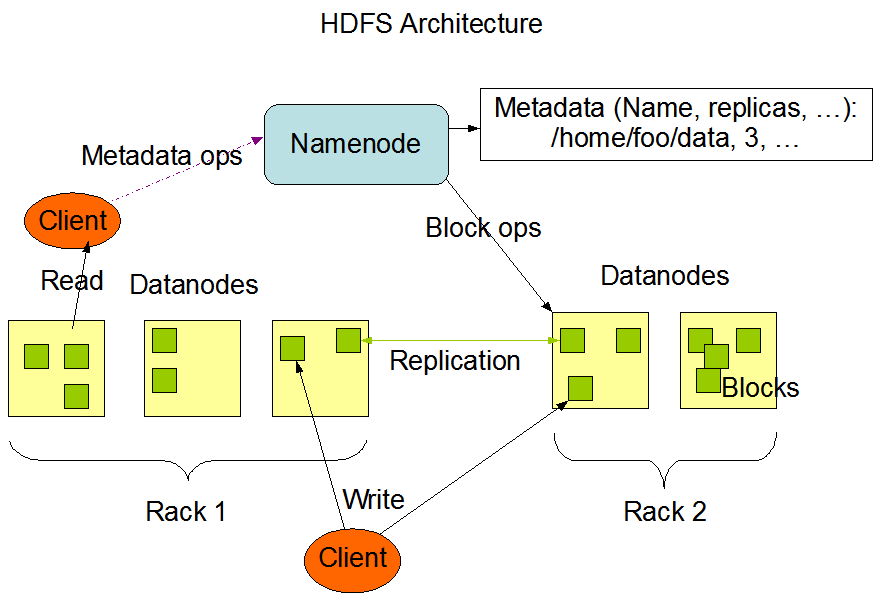


HDFS follows a master-slave architecture, consisting of three primary components:
1. NameNode (Master)
2. Role: Manages metadata (file names, locations, replicas).

Responsibilities:

Keeps track of file system structure. Manages access permissions. Ensures fault tolerance by monitoring DataNodes. Does not store actual data, only metadata.
1. DataNode (Slaves)
Role: Stores actual data blocks of files.
Responsibilities:
Reads and writes data as instructed by NameNode.
Periodically sends a "heartbeat" to NameNode indicating availability.
Performs block replication and data recovery.
2.  Secondary NameNode
Role: Assists NameNode in metadata management.
Responsibilities:
Takes periodic snapshots of the NameNode metadata.
Helps recover NameNode failure (not a real-time backup).
Reduces the workload of the NameNode.

**HDFS File Storage Mechanism**
-Blocks in HDFS
Each file in HDFS is split into fixed-size blocks (default 128 MB).
Blocks are stored across multiple DataNodes.
Large block size reduces the overhead of managing many small files.
- Data Replication
Each block is replicated (default: 3 copies) across different nodes.
Ensures fault tolerance and high availability.
If a DataNode fails, the system automatically creates a new copy.
- Rack Awareness
HDFS understands the physical topology of the cluster.
Tries to store copies of data on different racks to minimize data loss risk.

**HDFS Data Read & Write Operations**
- Writing a File to HDFS
The client contacts the NameNode to get metadata information.
The NameNode assigns DataNodes to store the file's blocks.
The client writes data to the first DataNode, which then copies to others for replication.
Once replication is completed, the client gets confirmation.
- Reading a File from HDFS
The client requests the NameNode for file location.
The NameNode provides a list of DataNodes containing the file blocks.
The client reads data directly from the nearest DataNode.
Data is fetched in parallel to improve performance.
- Fault Tolerance in HDFS
HDFS ensures reliability through:
Replication: Multiple copies of each block are maintained.
Heartbeats: DataNodes regularly report health status to the NameNode.
Automatic Recovery: If a DataNode fails, the NameNode reallocates missing blocks.

In [ ]:
#Download Hadoop using Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check whether file is present in the Google drive
!ls /content/drive/MyDrive/hadoop-3.3.6.tar.gz

/content/drive/MyDrive/hadoop-3.3.6.tar.gz


In [ ]:
!cp /content/drive/MyDrive/hadoop-3.3.6.tar.gz /content/
!ls /content/

customers.txt  hadoop-3.3.6.tar.gz  pig-0.17.0.tar.gz
drive	       pig-0.17.0	    sample_data


# Installation
---
### Step - 1 - Download Hadoop from Google Drive
1. Mount Google Drive

  `
  from google.colab import drive
  drive.mount('/content/drive')
  `

2. Verify

`#Check whether file is present in the Google drive
!ls /content/drive/MyDrive/hadoop-3.3.6.tar.gz`


or

### Step - 1 - Download Hadoop from internet

Use the following command to download Hadoop:

 `wget https://archive.apache.org/dist/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz`

In [ ]:
#!wget https://archive.apache.org/dist/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz

You would can get other version if you need in: https://downloads.apache.org/hadoop/common/ and later replace it in the before command.


---

### Step 2 - Unzip and copy hadoop binary to colab local directory

For this I used the following command:

`!tar -xzvf hadoop-3.3.6.tar.gz && cp -r hadoop-3.3.6/ /usr/local/`

In [ ]:
!tar -xzvf hadoop-3.3.6.tar.gz && cp -r hadoop-3.3.6/ /usr/local/

Streaming output truncated to the last 5000 lines.
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/BufferSizeParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/DeleteOpParam.Op.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/PutOpParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/RenameOptionSetParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/XAttrEncodingParam.

---

### Step 3 - Set up Java for Haddop

I use following command:
```
#How to find the default Java path on colab, and add export in hadoop-env.sh
JAVA_HOME = !readlink -f /usr/bin/java | sed "s:bin/java::"
java_home_text = JAVA_HOME[0]
java_home_text_command = f"$ {JAVA_HOME[0]} "
!echo export JAVA_HOME=$java_home_text >>/usr/local/hadoop-3.3.6/etc/hadoop/hadoop-env.sh
```

In [ ]:
#To find the default Java path and add export in hadoop-env.sh
JAVA_HOME = !readlink -f /usr/bin/java | sed "s:bin/java::"
java_home_text = JAVA_HOME[0]
java_home_text_command = f"$ {JAVA_HOME[0]} "
!echo export JAVA_HOME=$java_home_text >>/usr/local/hadoop-3.3.6/etc/hadoop/hadoop-env.sh
!echo "JAVA_HOME =" $JAVA_HOME

JAVA_HOME = [/usr/lib/jvm/java-11-openjdk-amd64/]


In [ ]:
!export HDFS_NAMENODE_USER="root"
!export HDFS_DATANODE_USER="root"
!export HDFS_SECONDARYNAMENODE_USER="root"
!export YARN_RESOURCEMANAGER_USER="root"
!export YARN_NODEMANAGER_USER="root"

---

### Step 4 - How to Setup Hadoop home variables

I used following command:
```
# Set environment variables
import os
os.environ['HADOOP_HOME']="/usr/local/hadoop-3.3.6"
os.environ['JAVA_HOME']=java_home_text
```

In [ ]:
import os
os.environ['HADOOP_HOME']="/usr/local/hadoop-3.3.6"
os.environ['JAVA_HOME']=java_home_text

---

### Step 5 - How to Run Hadoop

I used the following command:

`!/usr/local/hadoop-3.3.6/bin/hadoop`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in worker mode
hosts filename                   list of hosts to use in worker mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
  

In [ ]:
!ls /usr/local/hadoop-3.3.6/etc/hadoop

capacity-scheduler.xml		  httpfs-env.sh		      mapred-site.xml
configuration.xsl		  httpfs-log4j.properties     shellprofile.d
container-executor.cfg		  httpfs-site.xml	      ssl-client.xml.example
core-site.xml			  kms-acls.xml		      ssl-server.xml.example
hadoop-env.cmd			  kms-env.sh		      user_ec_policies.xml.template
hadoop-env.sh			  kms-log4j.properties	      workers
hadoop-metrics2.properties	  kms-site.xml		      yarn-env.cmd
hadoop-policy.xml		  log4j.properties	      yarn-env.sh
hadoop-user-functions.sh.example  mapred-env.cmd	      yarnservice-log4j.properties
hdfs-rbf-site.xml		  mapred-env.sh		      yarn-site.xml
hdfs-site.xml			  mapred-queues.xml.template


In [ ]:
!cat /usr/local/hadoop-3.3.6/etc/hadoop/core-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
</configuration>


In [ ]:
%%writefile /usr/local/hadoop-3.3.6/etc/hadoop/core-site.xml
<configuration>
    <property>
        <name>hadoop.tmp.dir</name>
        <value>/tmp</value>
    </property>
</configuration>

Overwriting /usr/local/hadoop-3.3.6/etc/hadoop/core-site.xml


In [ ]:
!cat /usr/local/hadoop-3.3.6/etc/hadoop/hdfs-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>

</configuration>


In [ ]:
%%writefile /usr/local/hadoop-3.3.6/etc/hadoop/hdfs-site.xml
<configuration>
    <property>
        <name>dfs.replication</name>
        <value>2</value>
    </property>
</configuration>

Overwriting /usr/local/hadoop-3.3.6/etc/hadoop/hdfs-site.xml


### Step 6 - List of HDFS Commands

1. Create an empty file in HDFS
2. Create a folder on HDFS
3. Remove a folder
4. List the contents of the folder


#### 6.1 - Create an empty file in HDFS

I use follwing command

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -touchz file`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -touchz file.txt

####6.2 - Create an empty folder on HDFS

I use following command:

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -mkdir temp`


In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -mkdir temp

#### 6.3 - Remove folder from HDFS

I use following command

`!/usr/local/hadoop-3.3.4/bin/hadoop fs -rm -r temp`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -rm -r temp

rm: `temp': No such file or directory


#### 6.4 - List the contents of a folder from HDFS

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls

Found 6 items
drwxr-xr-x   - root       root             4096 2025-03-19 13:34 .config
drwx------   - root       root             4096 2025-03-21 00:07 drive
-rw-r--r--   1 root       root                0 2025-03-21 00:39 file.txt
drwxr-xr-x   - hadoopuser hadoopuser       4096 2023-06-18 09:08 hadoop-3.3.6
-rw-------   1 root       root        730107476 2025-03-21 00:07 hadoop-3.3.6.tar.gz
drwxr-xr-x   - root       root             4096 2025-03-19 13:34 sample_data


---

### Step 7 - We used Project Gutenberg to select the dataset  
Download the ebook from Project Gutenberg website

https://www.gutenberg.org/cache/epub/29645/pg29645.txt


`!wget https://www.gutenberg.org/cache/epub/29645/pg29645.txt`

In [ ]:
!pwd
!wget https://www.gutenberg.org/cache/epub/29645/pg29645.txt

/content
--2025-04-10 03:54:39--  https://www.gutenberg.org/cache/epub/29645/pg29645.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304929 (298K) [text/plain]
Saving to: ‘pg29645.txt’

pg29645.txt         100%[===================>] 297.78K  1022KB/s    in 0.3s    

2025-04-10 03:54:39 (1022 KB/s) - ‘pg29645.txt’ saved [304929/304929]



In [ ]:
!ls /content/pg29645.txt

/content/pg29645.txt


How to move file from  directory to HDFS:

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -copyFromLocal /content/pg29645.txt`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -copyFromLocal /content/pg29645.txt

copyFromLocal: `pg29645.txt': File exists


For list them:

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls `

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls

Found 6 items
drwxr-xr-x   - root root       4096 2025-04-07 13:42 .config
drwx------   - root root       4096 2025-04-10 03:49 drive
drwxr-xr-x   - 1000 1000       4096 2023-06-18 09:08 hadoop-3.3.6
-rw-------   1 root root  730107476 2025-04-10 03:53 hadoop-3.3.6.tar.gz
-rw-r--r--   1 root root     304929 2025-03-12 13:13 pg29645.txt
drwxr-xr-x   - root root       4096 2025-04-07 13:43 sample_data


---

### Step 8 - Writing Mapper and Reducer


In [ ]:
%%writefile mapper.py
#!/usr/bin/python
import sys
for line in sys.stdin:
  for token in line.strip().split(" "):
    if token:
      print(token + '\t1')

Writing mapper.py


In [ ]:
# 25-03-2025 Code
#!ls /content
!cat mapper.py

#!/usr/bin/python
import sys
for line in sys.stdin:
  for token in line.strip().split(" "):
    if token:
      print(token + '\t1')


In [ ]:
%%writefile sample.txt
I am an Indian.
I love my country.
Proud to be born as Indian.

Writing sample.txt


In [ ]:
!cat sample.txt

I am an Indian.
I love my country.
Proud to be born as Indian.


In [ ]:
!cat sample.txt | python mapper.py

I	1
am	1
an	1
Indian.	1
I	1
love	1
my	1
country.	1
Proud	1
to	1
be	1
born	1
as	1
Indian.	1


In [ ]:
!cat pg29645.txt | python mapper.py

Streaming output truncated to the last 5000 lines.
self.	1
+Ibī+,	1
there.	1
+Inde+,	1
thence.	1
+De·inde+,	1
thereupon.	1
+Ita+,	1
thus.	1
+Ita·que+,	1
therefore.	1
+Item+,	1
likewise.	1
+?I·dōneus+,	1
suitable.	1
	1
+Ūnus+	1
[for	1
_oenus_],	1
one.	1
+Ūnā+,	1
together.	1
+Ūni·versus+,	1
all.	1
+Ūn·decimus+,	1
eleventh.	1
+Ūllus+	1
[for	1
_ūnulus_],	1
any.	1
+Nūllus+	1
[for	1
_ne·ūnulus_],	1
none.	1
+Nōn·nūllus+,	1
some.	1
+Nōn+	1
[_ne·oenum	1
(ūnum)_],	1
not.	1
+Nōn·dum+,	1
not	1
yet.	1
	1
IA-,	1
IAC-,	1
go,	1
send.	1
+Iaciō+,	1
throw.	1
+Ad·iciō+,	1
hurl.	1
+Circum·iciō+,	1
place	1
around.	1
+Cōn·iciō+,	1
hurl.	1
+Dē·iciō+,	1
throw	1
down	1
from.	1
+Dē·iectus+,	1
slope.	1
+Inter·iciō+,	1
place	1
between.	1
+Prō·iciō+,	1
hurl.	1
+Re·iciō+,	1
hurl	1
back.	1
+Iaceō+,	1
lie.	1
	1
IC-,	1
AIC-,	1
like.	1
+Aequāl·iter+,	1
evenly.	1
+Ad·aequō+,	1
equal.	1
+In·īquus+,	1
unfavorable.	1
+In·īquitās+,	1
inequality.	1
	1
IV-,	1
IVG-,	1
bind,	1
yoke.	1
+Iugum+,	1
ridge.	1
+Con·iungō+,	1
join	1
to

In [ ]:
%%writefile reducer.py
#!/usr/bin/python
import sys
w = {}

# Process each key-value pair from the mapper
for line in sys.stdin:
    # Get the key and value from the current line
    word, count = line.split('\t')
    # Convert the count to an int
    count = int(count)

    if word in w:
        w[word] = w[word] + count
    else:
        w[word] = count


for word in w.keys():
    print(word,w[word])


Writing reducer.py


In [ ]:
!cat sample.txt | python mapper.py | python reducer.py

I 2
am 1
an 1
Indian. 2
love 1
my 1
country. 1
Proud 1
to 1
be 1
born 1
as 1


In [ ]:
!pwd

/content


---

### 9th - Installing dependencies to use Python

We can install dependency to use MapReduce using:

`!pip install mrjob`

I recomend learn more about mrjob in: https://mrjob.readthedocs.io/en/latest/

In [ ]:
!pip install mrjob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 7.4 MB/s eta 0:00:00


---

### 10th - Mananging temp folder 💿

You can create in anywhere you want.

We create a temp folder to use when we run job:

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -mkdir file:///tmp`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -mkdir file:///tmp


mkdir: `file:///tmp': File exists


We assign permissions to temp folder with:

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -mkdir file:///tmp`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -chmod 777 file:///tmp

We list files of temp folder:

`!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls file:///tmp`

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls file:///tmp

Found 32 items
-rwxr-xr-x   1 root root          0 2025-04-10 03:47 file:///tmp/colab_runtime.sock
-rw-r--r--   1 root root       1297 2025-04-10 03:47 file:///tmp/dap_multiplexer.9bd833e86c6d.root.log.INFO.20250410-034756.92
-rw-r--r--   1 root root       1297 2025-04-10 03:47 file:///tmp/dap_multiplexer.INFO
-rwxr-xr-x   1 root root          0 2025-04-10 03:47 file:///tmp/debugger_r39skadl7
-rw-r--r--   1 root root       1347 2025-04-10 03:49 file:///tmp/directoryprefetcher_binary.9bd833e86c6d.root.log.INFO.20250410-034917.664
-rw-r--r--   1 root root       1347 2025-04-10 03:49 file:///tmp/directoryprefetcher_binary.INFO
-rw-------   1 root root        754 2025-04-10 03:49 file:///tmp/drive.9bd833e86c6d.root.log.ERROR.20250410-034911.482
-rw-------   1 root root       2115 2025-04-10 03:49 file:///tmp/drive.9bd833e86c6d.root.log.ERROR.20250410-034916.585
-rw-r--r--   1 root root       2786 2025-04-10 03:49 file:///tmp/drive.9bd833e86c6d.root.log.INFO.20250410-034910.471
-rw-------  

---

### 11th - Creating process to use with MRJOB using Python

To create job in Python, you must see structure of dataset to configure jobs.
In this case dataset is like:

`!head /content/pg29645.txt`

In [ ]:
# %%writefile WordCount.py
# # import modules
# from mrjob.job import MRJob
# from mrjob.step import MRStep

# # create class inhereted from MRJob
# class WordCount(MRJob):
#   # assign steps, first mapper last reducer
#   def steps(self):
#     return [
#             MRStep(mapper=self.mapper_get_input,
#                    reducer=self.reducer_word_count)
#     ]

#   # creating mapper, assigning attributes from dataset
#   def mapper_get_input(self, _, line):
#     for token in line.strip().split(" "):
#       if token:
#         # assign like the key rating and assign each row value 1
#         yield word, 1




#   # creating reducer, sum
#   def reducer_word_count(self, key, values):
#     # in function of each key we sum values
#      # Get the key and value from the current line
#     word, count = key,values
#     # Convert the count to an int
#     count = int(count)

#     if word in w:
#         w[word] = w[word] + count
#     else:
#         w[word] = count
#     yield w[word], sum(count)

# if __name__ == '__main__':
#   WordCount.run()

In [ ]:
!head /content/pg29645.txt -n 10

﻿The Project Gutenberg eBook of The Gate to Cæsar
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



---

### 12th - Running the process

Here we run the process specifing some parameters:
- Python file program `!python RatingBreakdown.py`
- Where is .jar to run hadoop `/usr/local/hadoop-3.3.4/share/hadoop/tools/lib/hadoop-streaming-3.3.4.jar`
- Temp file and dataset `file:///tmp /content/ml-100k/u.data`

When run process, maybe take a few minutes...
I run with:

`!python RatingBreakdown.py -r hadoop --hadoop-streaming-jar /usr/local/hadoop-3.3.4/share/hadoop/tools/lib/hadoop-streaming-3.3.4.jar --hadoop-tmp-dir file:///tmp /content/ml-100k/u.data`

In [ ]:
#!python WordCount.py -r hadoop --hadoop-streaming-jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar --hadoop-tmp-dir file:///tmp /content/pg29645.txt

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
-files /content/mapper.py,/content/reducer.py \
-mapper "python mapper.py" \
-reducer "python reducer.py" \
-input /content/sample.txt \
-output /content/output

2025-04-10 04:23:59,369 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2025-04-10 04:23:59,571 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2025-04-10 04:23:59,571 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2025-04-10 04:23:59,607 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2025-04-10 04:23:59,916 INFO mapred.FileInputFormat: Total input files to process : 1
2025-04-10 04:23:59,945 INFO mapreduce.JobSubmitter: number of splits:1
2025-04-10 04:24:00,327 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1588444666_0001
2025-04-10 04:24:00,327 INFO mapreduce.JobSubmitter: Executing with tokens: []
2025-04-10 04:24:00,843 INFO mapred.LocalDistributedCacheManager: Localized file:/content/mapper.py as file:/tmp/hadoop-root/mapred/local/job_local1588444666_0001_8b4bdaa1-db40-4960-969b-70c9e0111a53/mapper.py
2025-04-10 04:24:00,880 INFO mapred.LocalDistributedCacheMa

In [ ]:
!ls /content/output/

part-00000  _SUCCESS


In [ ]:
! cat /content/output/part-00000

I 2	
Indian. 2	
Proud 1	
am 1	
an 1	
as 1	
be 1	
born 1	
country. 1	
love 1	
my 1	
to 1	


**UNIT-3 & Unit-4**

# PIG
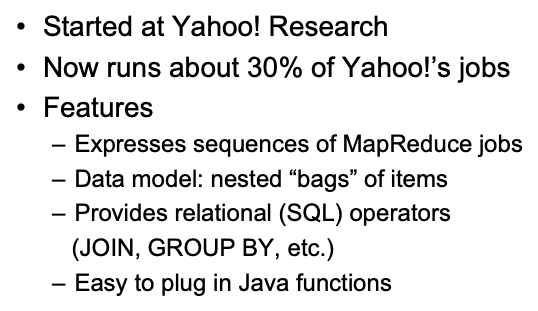

In [ ]:
!wget https://dlcdn.apache.org/pig/pig-0.17.0/pig-0.17.0.tar.gz

--2025-04-17 03:43:25--  https://dlcdn.apache.org/pig/pig-0.17.0/pig-0.17.0.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230606579 (220M) [application/x-gzip]
Saving to: ‘pig-0.17.0.tar.gz’

pig-0.17.0.tar.gz   100%[===================>] 219.92M   196MB/s    in 1.1s    

2025-04-17 03:43:36 (196 MB/s) - ‘pig-0.17.0.tar.gz’ saved [230606579/230606579]



In [ ]:
!ls

drive  hadoop-3.3.6  hadoop-3.3.6.tar.gz  pig-0.17.0.tar.gz  sample_data


In [ ]:
!tar -xzvf pig-0.17.0.tar.gz && cp -r pig-0.17.0/ /usr/local/

Streaming output truncated to the last 5000 lines.
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicBigIntegerMathBase.Final.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicBigIntegerMathBase.Intermediate.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicBigIntegerMathBase.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicByteArrayMathBase.Final.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicByteArrayMathBase.Initial.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicByteArrayMathBase.Intermediate.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicByteArrayMathBase.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicDoubleMathBase.Final.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicDoubleMathBase.Intermediate.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicDoubleMathBase.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicFloatMathBase.Final.html
pig-0.17.0/docs/api/org/apache/pig/builtin/AlgebraicFloatMathBa

In [ ]:
!ls /usr/local/pig-0.17.0/

In [ ]:
!export PIG_HOME=/usr/local/pig-0.17.0/
!export PATH=\$PATH:/usr/local/pig-0.17.0/bin
!export PIG_CLASSPATH=$HADOOP_HOME/conf

In [ ]:
!/usr/local/pig-0.17.0/bin/pig -h properties

The following properties are supported:
    Logging:
        verbose=true|false; default is false. This property is the same as -v switch
        brief=true|false; default is false. This property is the same as -b switch
        debug=OFF|ERROR|WARN|INFO|DEBUG; default is INFO. This property is the same as -d switch
        aggregate.warning=true|false; default is true. If true, prints count of warnings
            of each type rather than logging each warning.
    Performance tuning:
        pig.cachedbag.memusage=<mem fraction>; default is 0.2 (20% of all memory).
            Note that this memory is shared across all large bags used by the application.
        pig.skewedjoin.reduce.memusagea=<mem fraction>; default is 0.3 (30% of all memory).
            Specifies the fraction of heap available for the reducer to perform the join.
        pig.exec.nocombiner=true|false; default is false. 
            Only disable combiner as a temporary workaround for problems.
        opt.multiquer

In [ ]:
!/usr/local/pig-0.17.0/bin/pig -x local

2025-04-17 03:48:04,995 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2025-04-17 03:48:04,996 INFO pig.ExecTypeProvider: Picked LOCAL as the ExecType
2025-04-17 03:48:05,089 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2025-04-17 03:48:05,089 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1744861685085.log
2025-04-17 03:48:05,134 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2025-04-17 03:48:05,340 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2025-04-17 03:48:05,351 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: file:///
2025-04-17 03:48:05,544 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
2025-04-17 

In [ ]:
%%writefile customers.txt
'A-23-112', 'ashbb', 2234, 'Aug 13th', 'Satoshi'
'B-34-122', 'tiger', 5543, 'May 1st', 'Satish'
'A-15-982', 'pen', 7812, 'Sep 24th', 'Michael'

Overwriting customers.txt


In [ ]:
%%writefile load.pig
customers = LOAD 'customers.txt' USING PigStorage(',') as (ID:chararray,account:chararray, tel:int, last_access:chararray, name:chararray);
Dump customers;
STORE customers INTO 'Pig_Output/customers.txt' USING PigStorage (',');

Writing load.pig


In [ ]:
!/usr/local/pig-0.17.0/bin/pig -x local load.pig

2025-04-17 03:48:22,524 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2025-04-17 03:48:22,525 INFO pig.ExecTypeProvider: Picked LOCAL as the ExecType
2025-04-17 03:48:22,682 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2025-04-17 03:48:22,683 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1744861702678.log
2025-04-17 03:48:22,733 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - user.name is deprecated. Instead, use mapreduce.job.user.name
2025-04-17 03:48:23,076 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2025-04-17 03:48:23,197 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2025-04-17 03:48:23,202 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: file:///
2025-04-17 03:48:23,24

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop dfs -ls Pig_Output/


Found 1 items
drwxr-xr-x   - root root       4096 2025-04-17 03:48 Pig_Output/customers.txt


In [ ]:
%%writefile students.txt
001,Rajiv,Reddy,21,9848022337,Hyderabad
002,siddarth,Battacharya,22,9848022338,Kolkata
003,Rajesh,Khanna,22,9848022339,Delhi
004,Preethi,Agarwal,21,9848022330,Pune
005,Trupthi,Mohanthy,23,9848022336,Bhuwaneshwar
006,Archana,Mishra,23,9848022335,Chennai
007,Komal,Nayak,24,9848022334,trivendram
008,Bharathi,Nambiayar,24,9848022333,Chennai

Writing students.txt


In [ ]:
%%writefile test.pig
customers = LOAD 'customers.txt' USING PigStorage(',') as (ID:chararray,account:chararray, tel:int, last_access:chararray, name:chararray);


students = LOAD 'students.txt' USING PigStorage(',') as (ID:int,fname:chararray,lname:chararray,age:int,tel:long, city:chararray);
rarray,lname:chararray,age:int,tel:long, city:chararray);

group_data = GROUP students by age;

Dump group_data;


Writing test.pig


In [ ]:
!cat customers.txt
!cat students.txt

'A-23-112', 'ashbb', 2234, 'Aug 13th', 'Satoshi'
'B-34-122', 'tiger', 5543, 'May 1st', 'Satish'
'A-15-982', 'pen', 7812, 'Sep 24th', 'Michael'
001,Rajiv,Reddy,21,9848022337,Hyderabad
002,siddarth,Battacharya,22,9848022338,Kolkata
003,Rajesh,Khanna,22,9848022339,Delhi
004,Preethi,Agarwal,21,9848022330,Pune
005,Trupthi,Mohanthy,23,9848022336,Bhuwaneshwar
006,Archana,Mishra,23,9848022335,Chennai
007,Komal,Nayak,24,9848022334,trivendram
008,Bharathi,Nambiayar,24,9848022333,Chennai


In [ ]:
!/usr/local/pig-0.17.0/bin/pig -x local

2025-04-17 04:01:40,312 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2025-04-17 04:01:40,313 INFO pig.ExecTypeProvider: Picked LOCAL as the ExecType
2025-04-17 04:01:40,425 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2025-04-17 04:01:40,425 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1744862500420.log
2025-04-17 04:01:40,472 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2025-04-17 04:01:40,638 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2025-04-17 04:01:40,644 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: file:///
2025-04-17 04:01:40,827 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
2025-04-17 

# Learn
1. Pig Installation
2. Pig Configuration
3. Pig Grunt Commands (LOAD, STORE, PigStorage, DUMP, GROUP BY, ILLUSTRATE)
4. Execution method of the commands

Example:
![image.png](
  
)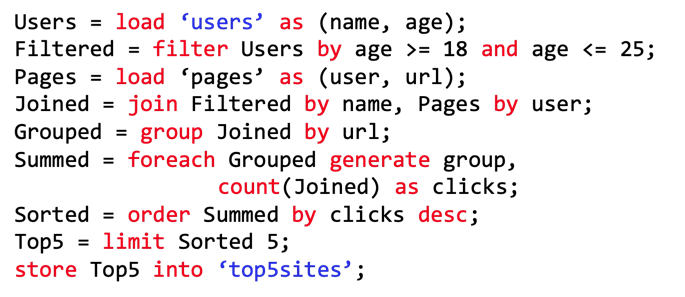

# Install MongoDB Community Edition
We will install MongoDB 8.0 Community Edition on LTS (long-term support) releases of Ubuntu Linux using the apt package manager.

Platform Support
MongoDB 8.0 Community Edition supports the following 64-bit Ubuntu LTS (long-term support) releases on x86_64 architecture:

24.04 LTS ("Noble")

22.04 LTS ("Jammy")

20.04 LTS ("Focal")

MongoDB only supports the 64-bit versions of these platforms. To determine which Ubuntu release your host is running, run the following command on the host's terminal:
```
cat /etc/lsb-release
```

In [8]:
!cat /etc/lsb-release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.4 LTS"


## Install MongoDB Community Edition
Follow these steps to install MongoDB Community Edition using the apt package manager.

1. Import the public key.
From a terminal, install gnupg and curl if they are not already available:
```
sudo apt-get install gnupg curl
```
2. Import the MongoDB public GPG key, run the following command:
```
!curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg \
   --dearmor
```

In [10]:
!curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg \
   --dearmor

## Create the list file.
Create the list file /etc/apt/sources.list.d/mongodb-org-8.0.list for your version of Ubuntu.

```
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list
```



In [11]:
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list

deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 multiverse


## Reload the package database.
Issue the following command to reload the local package database:
```
sudo apt-get update
```

In [12]:
!sudo apt update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 InRelease [3,005 B]
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0/multiverse amd64 Packages [32.0 kB]
Get:13 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0/multiverse arm64 Packages [31.7 kB]
Fe

## Install MongoDB Community Server.
You can install either the latest stable version of MongoDB or a specific version of MongoDB.

1. Get the gpg key and add it to release
```
!wget -qO - https://www.mongodb.org/static/pgp/server-5.0.asc | sudo apt-key add -
```
2. To install the latest stable version, issue the following
```
sudo apt-get install -y mongodb-org
```

In [5]:
!wget -qO - https://www.mongodb.org/static/pgp/server-5.0.asc | sudo apt-key add -

OK


In [13]:
!sudo apt-get install -y mongodb-org

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  mongodb-database-tools mongodb-mongosh mongodb-org-database
  mongodb-org-database-tools-extra mongodb-org-mongos mongodb-org-server
  mongodb-org-shell mongodb-org-tools
The following NEW packages will be installed:
  mongodb-database-tools mongodb-mongosh mongodb-org mongodb-org-database
  mongodb-org-database-tools-extra mongodb-org-mongos mongodb-org-server
  mongodb-org-shell mongodb-org-tools
0 upgraded, 9 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 MB of archives.
After this operation, 655 MB of additional disk space will be used.
Get:1 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0/multiverse amd64 mongodb-database-tools amd64 100.12.0 [58.8 MB]
Get:2 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0/multiverse amd64 mongodb-mongosh amd64 2.5.0 [54.5 MB]
Get:3 https://repo.mongodb.org/apt

## Create mongodb data diretory
Create the data directory: Before starting mongod, you need to create the directory you specified with the --dbpath option. Run the following command:
```
mkdir -p /content/mongodb_data
```

In [21]:
!mkdir -p /content/mongodb_data

## Start the MongoDB server
After creating the directory, try starting the mongod server:
```
!mongod --dbpath /content/mongodb_data --fork --logpath /content/mongodb.log --logappend
```

In [ ]:
!mongod --dbpath /content/mongodb_data --fork --logpath /content/mongodb.log --logappend

In [ ]:
!mongosh "mongodb://127.0.0.1:27017/"

]0;mongosh mongodb://127.0.0.1:27017/?directConnection=true&serverSelectionTimeoutMS=2000Current Mongosh Log ID:	6807c8ce60d099ca65d861df
Connecting to:		mongodb://127.0.0.1:27017/?directConnection=true&serverSelectionTimeoutMS=2000&appName=mongosh+2.5.0
Using MongoDB:		8.0.8
Using Mongosh:		2.5.0

For mongosh info see: https://www.mongodb.com/docs/mongodb-shell/

 ------
   The server generated these startup warnings when booting
   2025-04-22T16:49:01.275+00:00: Access control is not enabled for the database. Read and write access to data and configuration is unrestricted
   2025-04-22T16:49:01.275+00:00: You are running this process as the root user, which is not recommended
   2025-04-22T16:49:01.275+00:00: This server is bound to localhost. Remote systems will be unable to connect to this server. Start the server with --bind_ip <address> to specify which IP addresses it should serve responses from, or with --bind_ip_all to bind to all interfaces. If this behavior is desired, sta

## Basic Mongosh Commands
1. ```show dbs```: This command lists all the databases on the MongoDB server.

```
show dbs
```
2. ```use <databaseName>```: This command switches to or creates a new database. For example, to use a database named mydb:
```
use mydb
```
If mydb doesn't exist, MongoDB will create it when you first store data in it.
3. db: This command shows the name of the current database you are using.
```
db
```
4. ```show collections```: Once you are in a specific database, this command lists all the collections within that database.
```
show collections
```
### Working with Collections and Documents - Insertion

5. ```db.<collectionName>.insertOne(<document>)```: This command adds a single document to the specified collection. If the collection doesn't exist, MongoDB will create it.
```
db.users.insertOne({ name: "Gaurav Parashar", age: 47, city: "Ghaziabad" })
```
You should see output indicating that the insertion was successful, including the _id of the inserted document.

6. ```db.<collectionName>.insertMany([<document1>, <document2>, ...])```: This command adds multiple documents to the specified collection at once.
```
db.products.insertMany([
  { name: "Laptop", price: 12000 },
  { name: "Mouse", price: 450 },
  { name: "Keyboard", price: 750 }
])
```
Querying Data - Finding Documents

7. ```db.<collectionName>.find()```: This command retrieves all documents in the specified collection.
```
db.students.find()
```
You should see all the student documents you inserted in the previous step.
8. ```db.<collectionName>.find({})```: This is equivalent to the above command; an empty query object {} matches all documents.

```
db.students.find({})
```
9. **Querying with Criteria**: You can specify criteria in the find() method to retrieve only the documents that match your conditions. The criteria are expressed as a document with the fields you want to filter on and their desired values.

* Equality: To find students with a specific name:
```
db.students.find({ name: "Gaurav" })
```
* Comparison Operators: MongoDB provides various comparison operators (e.g., ```$gt``` for greater than, ```$lt``` for less than, ```$gte``` for greater than or equal to, ```$lte``` for less than or equal to, ```$eq``` for equal to, ```$ne``` for not equal to).
Eg: To find students with a grade greater than 85:
```
db.students.find({ age: { $gt: 45 } })
```
* Logical Operators: You can combine multiple criteria using logical operators like ```$and```, ```$or```.
To find students with a grade greater than 80 AND majoring in "Computer Science & Engineering":
```
db.students.find({ $and: [{ grade: { $gt: 80 } }, { major: "Computer Science & Engineering" }] })
```
* To find students with a grade less than 70 OR majoring in "History":
```
db.students.find({ $or: [{ grade: { $lt: 70 } }, { major: "History" }] })
```